<a href="https://colab.research.google.com/github/lonecoder007/practice_projects-of-Artificial-neural-network/blob/master/cnn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten,Dropout,Activation
from keras.utils import np_utils
import tensorflow

In [3]:
X=pd.read_csv('fashion-mnist-test.csv')

In [4]:
X.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [5]:
x_=np.array(X)

In [6]:
x=x_[:,1:]
x=x/255.0
y=x_[:,0]
print(x.shape,y.shape)

(10000, 784) (10000,)


In [7]:
x_train=x.reshape((-1,28,28,1))
y_train=np_utils.to_categorical(y)

In [8]:
print(x_train.shape,y_train.shape)

(10000, 28, 28, 1) (10000, 10)


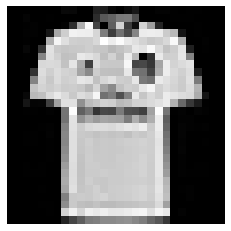

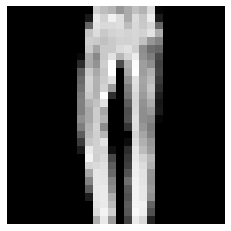

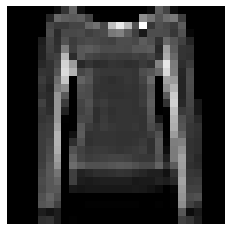

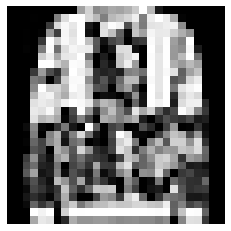

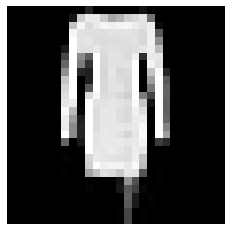

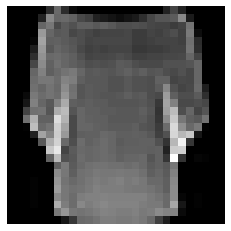

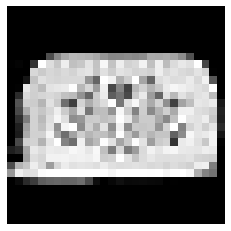

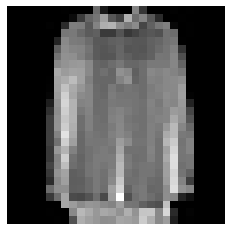

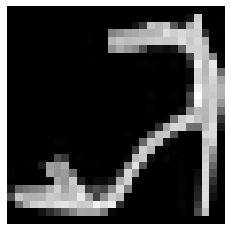

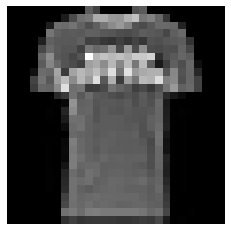

In [9]:
for i in range(10):
    plt.figure()
    plt.axis('off')
    plt.imshow(x_train[i].reshape((28,28)),cmap='gray')
    plt.show

In [15]:
model = Sequential()

model.add(Conv2D(3 , (3,3) , input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(5 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 3)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 5)         140       
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 5)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 125)              

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
hist=model.fit(x_train,y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 296us/step - loss: 2.2257 - accuracy: 0.3176 - val_loss: 1.9953 - val_accuracy: 0.6360
Epoch 2/20
8000/8000 [==============================] - 2s 288us/step - loss: 1.6661 - accuracy: 0.6220 - val_loss: 1.2866 - val_accuracy: 0.6750
Epoch 3/20
8000/8000 [==============================] - 2s 282us/step - loss: 1.0898 - accuracy: 0.6854 - val_loss: 0.9324 - val_accuracy: 0.7265
Epoch 4/20
8000/8000 [==============================] - 2s 284us/step - loss: 0.8652 - accuracy: 0.7218 - val_loss: 0.7929 - val_accuracy: 0.7345
Epoch 5/20
8000/8000 [==============================] - 2s 283us/step - loss: 0.7681 - accuracy: 0.7404 - val_loss: 0.7194 - val_accuracy: 0.7545
Epoch 6/20
8000/8000 [==============================] - 2s 280us/step - loss: 0.7085 - accuracy: 0.7505 - val_loss: 0.6711 - val_accuracy: 0.7555
Epoch 7/20
8000/8000 [==============================] - 2s 285us/step - loss

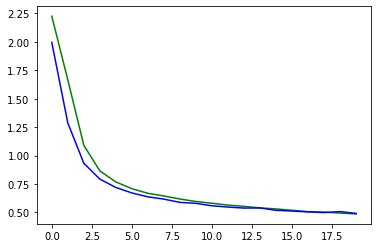

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

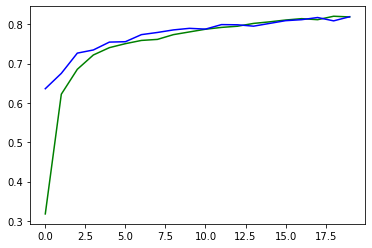

In [19]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'g')
plt.plot(hist.history['val_accuracy'],'b')
plt.show()